The first part of the notebook focuses on understanding the data by visualizing it and feature engineering. Feature engineering is a part of the data science job where the features (attributes like name, age, salary...) are being manipulated and result in new features which can further be used in the machine learning part of the data science project.

Feature engineering is also covering transforming text values into numerical values. Normalizing data is also a common or a must-do process because many algorithms perform better on normalized data. Solving challenges with missing values in the dataset is also a vital part.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [19]:
%matplotlib inline

In [20]:
#data used for training the model
file_train_data = "/user/marko/kaggle/titanic/data/train.csv"
train_df = pd.read_csv(file_train_data, sep=",", header=0)

<h2>Basic information about the training dataset</h2>

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#drop PassengerId
train_df = train_df.drop("PassengerId", axis=1)

<h2>Data Visualization and Exploration</h2>

<h3>Survived</h3>

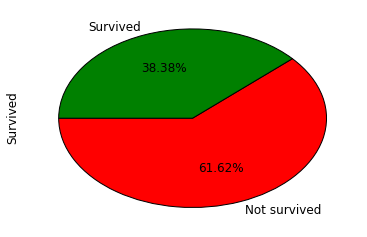

In [25]:
##survived vs not survived

#group by on Survived
survived_df = train_df.groupby("Survived")["Survived"].count()
#number of instances, convert to float to get decimal
no_of_instances = float(len(train_df))
#create labels for chart
labels = ["Not survived", "Survived"]
#fontsize in the chart
mpl.rcParams['font.size'] = 12.0
#output the chart
survived_df.plot.pie(labels=labels, colors=["red", "green"], autopct='%1.2f%%', startangle=180)

<h3>Survived grouped by gender</h3>

[468, 109]


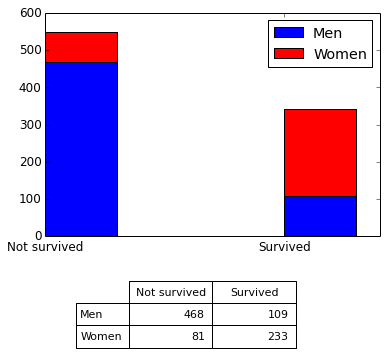

In [26]:
##survived grouped by gender
#data for male values
survived_male_list = list(train_df.loc[train_df["Sex"] == "male"].groupby(["Survived"])["Survived"].count())
print(survived_male_list)
#data for female values
survived_female_list = list(train_df.loc[train_df["Sex"] == "female"].groupby(["Survived"])["Survived"].count())

survive_status = ['Not survived', 'Survived']
gender_list = ['Men', 'Women']
N = 2
ind = np.arange(N)
width = 0.3
p1 = plt.bar(ind, survived_male_list, width=width, color="blue")
p2 = plt.bar(ind, survived_female_list, width=width, color="red", bottom=survived_male_list)
plt.xticks(ind, (survive_status))
plt.legend((p1[0], p2[0]), (gender_list))

the_table = plt.table(cellText=[survived_male_list, survived_female_list],
                      rowLabels=gender_list,
                      colLabels=survive_status,
                      bbox=[0.25, -0.5, 0.5, 0.3])


<h3>Survived grouped by Class</h3>

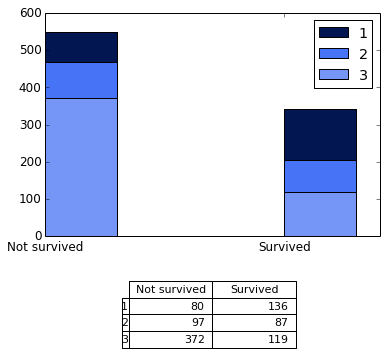

In [27]:
##survived grouped by class
#data for 1 values
survived_class_1_list = np.array(train_df.loc[train_df["Pclass"] == 1].groupby(["Survived"])["Survived"].count())
#data for 2 values
survived_class_2_list = np.array(train_df.loc[train_df["Pclass"] == 2].groupby(["Survived"])["Survived"].count())
#data for 3 values
survived_class_3_list = np.array(train_df.loc[train_df["Pclass"] == 3].groupby(["Survived"])["Survived"].count())

survive_status = ['Not survived', 'Survived']
class_list = [1,2,3]

N = 2
ind = np.arange(N)
width = 0.3
p3 = plt.bar(ind, survived_class_3_list, width=width, color="#7696f7")
p2 = plt.bar(ind, survived_class_2_list, width=width, color="#4773f7", bottom=survived_class_3_list)
p1 = plt.bar(ind, survived_class_1_list, width=width, color="#021651", bottom=survived_class_2_list + survived_class_3_list)
plt.xticks(ind, (survive_status))
plt.legend((p1[0], p2[0], p3[0]), (class_list))

the_table = plt.table(cellText=[survived_class_1_list, survived_class_2_list, survived_class_3_list],
                      rowLabels=class_list,
                      colLabels=survive_status,
                      bbox=[0.25, -0.5, 0.5, 0.3])


<h3>Survived grouped by Embarked</h3>

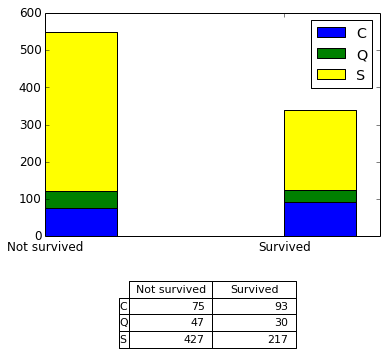

In [28]:
##survived grouped by embarked
#data for C values
survived_class_C_list = np.array(train_df.loc[train_df["Embarked"] == "C"].groupby(["Survived"])["Survived"].count())
#data for Q values
survived_class_Q_list = np.array(train_df.loc[train_df["Embarked"] == "Q"].groupby(["Survived"])["Survived"].count())
#data for S values
survived_class_S_list = np.array(train_df.loc[train_df["Embarked"] == "S"].groupby(["Survived"])["Survived"].count())


survive_status = ['Not survived', 'Survived']
class_list = ["C", "Q", "S"]

N = 2
ind = np.arange(N)
width = 0.3
p1 = plt.bar(ind, survived_class_C_list, width=width, color="blue")
p2 = plt.bar(ind, survived_class_Q_list, width=width, color="green", bottom=survived_class_C_list)
p3 = plt.bar(ind, survived_class_S_list, width=width, color="yellow", bottom=survived_class_C_list + survived_class_Q_list)
plt.xticks(ind, (survive_status))
plt.legend((p1[0], p2[0], p3[0]), (class_list))

the_table = plt.table(cellText=[survived_class_C_list, survived_class_Q_list, survived_class_S_list],
                      rowLabels=class_list,
                      colLabels=survive_status,
                      bbox=[0.25, -0.5, 0.5, 0.3])

<h2>Feature Engineering</h2>

Parse title from Name feature into feature Title

In [29]:
#parse title from Name feature into new feature
def parse_title(n):
    titleC = ""
    s = str(n)
    title =s[s.index(",") + 2:str(s).index(".")]
    return title
    
train_df["Title"] = train_df["Name"].map(lambda x: parse_title(x))

Quick and dirty check on Title representation among passengers

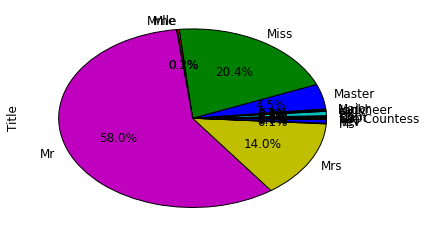

In [30]:
title_grouped_df = train_df.groupby("Title")["Title"].count()

title_grouped_df.plot.pie(autopct='%1.1f%%', startangle=0)

<h3>Calculate survival chance per title</h3>

           Title  Chance
8             Ms  1.0000
12          Mlle  1.0000
15  the Countess  1.0000
7            Mme  1.0000
10          Lady  1.0000
11           Sir  1.0000
1            Mrs  0.7920
2           Miss  0.6978
3         Master  0.5750
13           Col  0.5000
9          Major  0.5000
6             Dr  0.4286
0             Mr  0.1567
5            Rev  0.0000
14          Capt  0.0000
4            Don  0.0000
16      Jonkheer  0.0000


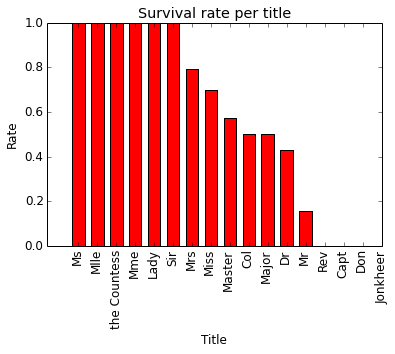

In [31]:
#Survived per Title
survived_title = pd.DataFrame(train_df.groupby(["Survived", "Title"])["Survived"].count())
#print(survived_title)
#print(np.array(survived_title).reshape(-1, 12))

df_title_rate = pd.DataFrame()

for title in train_df["Title"].unique():
    #print(title)
    all = train_df[train_df["Title"] == title]["Title"].count()
    surv = train_df[(train_df["Title"] == title) & (train_df["Survived"] == 1)]["Title"].count()
    #not_surv = train_df[(train_df["Title"] == title) & (train_df["Survived"] == 0)]["Title"].count()
    chance_pt = round(float(surv)/all, 4)
    tuple = [title, chance_pt]
    
    #ignore_index=True - 
    df_title_rate = df_title_rate.append([tuple], ignore_index=True)
 
df_title_rate.columns = ['Title', 'Chance']

df_title_rate = df_title_rate.sort_values("Chance", ascending=False)
print(df_title_rate)

#create an array of numbers for x axis
w = 3
nitems = df_title_rate["Title"].count()
x_axis = np.arange(0, nitems*w, w) 

fig, ax = plt.subplots()
ax.bar(x_axis, df_title_rate["Chance"], width=2, align='center', color='r')
ax.set_xticks(x_axis);
ax.set_xticklabels(list(df_title_rate["Title"]), rotation=90);
ax.set_title('Survival rate per title')
ax.set_xlabel('Title')
ax.set_ylabel('Rate')

Drop feature Name since title has been extracted

In [32]:
#feature Name can now be dropped
train_df = train_df.drop(["Name"], axis=1)

<h2>Classifying Title</h2>

Title can be classified in many ways. Classifying by gender would not make sense since we have gender feature - Sex.

One option would be to classify based on the survival rate. This gives feature <i>TitleSurvivalRate</i>.

<br>

Another feature built "on top of" Title has a more socially-biological explanation: Some groups, based on age and gender are worth more than others. For example, children and women are priorities. Among women, women who can potentially give birth are ranked higher.

The chart above disproves this since title "Mrs" has higher survival rate than "Miss". Here is where we move to the social dimension where social status played an important role in that period of time and also on the Titanic.

Some titles are occupational titles (Major, Dr,...). I am making an assumption that the reason for lower survival rate for these, socially important classes, lies in the "proudness" of the person carrying the title. For example, a Major or a Captain would hesistate to jump on the safety boat before all women and children are safe. 

However, there is not enough data to confirm this assumption. There are still many more people with title "Mr" who did not survived than the "proud" titles. The reason might lie in the passenger class distinction - class one was the highest on Titanic, class 3 was the lowest.

This new feature shall be named <i>TitleSocialStatus</i>.

<hr>

Survival rate of passengers with title "Mr" was very low. 

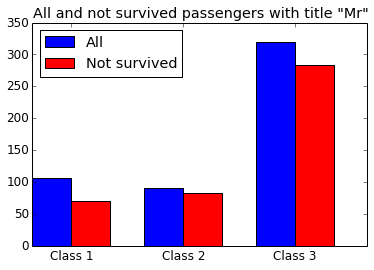

In [33]:
title_mr_group_by_class = np.array(train_df[train_df["Title"] == "Mr"].groupby(["Pclass"])["Pclass"].count())
#print(title_mr_group_by_class)
survived_title_mr_group_by_class = np.array(train_df[(train_df["Title"] == "Mr") &(train_df["Survived"] == 0)].groupby(["Pclass"])["Pclass"].count())
#print(survived_title_mr_group_by_class)

width = 0.35
N = len(title_mr_group_by_class)
ind = np.arange(N)
fig, ax = plt.subplots()
rect1 = ax.bar(ind, title_mr_group_by_class, width, color="b")
rect2 = ax.bar(ind+width, survived_title_mr_group_by_class, width, color="r")
ax.set_xticks(ind + width)
ax.set_xticklabels(('Class 1', 'Class 2', 'Class 3'))
ax.legend((rect1[0], rect2[0]), ('All', 'Not survived'), loc='upper left')
ax.set_title('All and not survived passengers with title "Mr"')

How was title "Mr" grouped per feature Pclass and what was survival rate

As assumed, there was not a very big difference among classes for title "Mr" who did not survive. Although "Class 1" had a better chance of surviving and interesting enough, "Class 3" had a higher chance of surviving than "Class 2". 

Could it be that servants who worked for "Class 1" passengers were taken with their employees on the rescue boats? For example, a nanny travelling in "Class 3" would help rescuing a child of a couple from "Class 1".

In [34]:
#create new feature based on survival rate of titles
def title_survival_rate(x):
    if x >= 1:
        return 0
    elif x >= 0.75:
        return 1
    elif x >= 0.60:
        return 2
    elif x >= 0.55:
        return 3
    elif x >= 0.40:
        return 4
    elif x >= 0.1:
        return 5
    else:
        return 6

train_df["TitleSurvivalRate"] = df_title_rate["Chance"].map(lambda x:  title_survival_rate(x))

In [35]:
def title_social_status(title):
      
    # class divided - detailed
    #young boys
    if (title in ['Master']):
        titleC = 0
    #young females - prime of life,
    elif (title in ['Mrs', 'Miss', 'Mme', 'Ms', 'Mlle']):
        titleC = 1
    #older females - high status symbol
    elif (title in ['Lady', 'the Countess']):
        titleC = 2
    #younger men - from biological perspective: worth least
    elif (title in ['Mr']):
        titleC = 3
    #older men - wouldnt board out of honor, too old to survive
    elif (title in ['Rev', 'Don', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']):
        titleC = 4
    else:
        titleC = 5
    return titleC

train_df["TitleSocialStatus"] = train_df["Title"].map(lambda x: title_social_status(x))



Convert features Sex and Embarked to numerical. Create new features

In [42]:
#convert sex to numerical - 0-woman, 1-man
encoder = LabelEncoder()
sex_numerical = encoder.fit_transform(train_df["Sex"])
train_df["SexNumerical"] = sex_numerical
print(encoder.classes_)

#convert embarked to numerical
encoder = LabelEncoder()
embarked_numerical = encoder.fit_transform(train_df["Embarked"])
train_df["EmbarkedNumerical"] = embarked_numerical
print(encoder.classes_)

['female' 'male']
[nan 'C' 'Q' 'S']


In [37]:
#normalizing Fare in interval from -1 to 1
#some algorithms perform better when values are normalized
standard_scaler = StandardScaler()
train_df["FareNormalized"] = standard_scaler.fit_transform(train_df["Fare"].values.reshape(-1, 1))

<h3>Replacing NaN in Age with -1</h3>

Replacing nulls, not a number or, in general, missing values is always tricky. First thought for filling in for missing age would be to put median value using Imputer. Another would be to calculate average for men and women and place average age according to the gender. One could go further and introduce Title - for example: if a person with missing age has a title Master then we know the age was less than 18, so using average (around 33) might influence the training of the model.

One approach is to create a new class for missing age with a value -1. A new feature called <i>AgeMinusOne</i> replaces NaN (Not a Number) with -1.

In [38]:
#create new feature based on Age where NaN = -1
train_df["AgeMinusOne"] = train_df["Age"].fillna(-1)

In [39]:
#drop non-numerical features
#train_df = train_df.drop(["Sex", "Embarked"], axis=1)

<h3>Viewing the first 5 lines of the dataset with the new features</h3>

In [40]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleSurvivalRate,TitleSocialStatus,SexNumerical,EmbarkedNumerical,FareNormalized,AgeMinusOne
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,5.0,3,1,3,-0.502445,22.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1.0,1,0,1,0.786845,38.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0,1,0,3,-0.488854,26.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0,1,0,3,0.420730,35.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,6.0,3,1,3,-0.486337,35.0


<h3>Histogram for all numerical features</h3>

array([[<matplotlib.axes.AxesSubplot object at 0x7f02ca1e1250>,
        <matplotlib.axes.AxesSubplot object at 0x7f02c9b7b990>]], dtype=object)

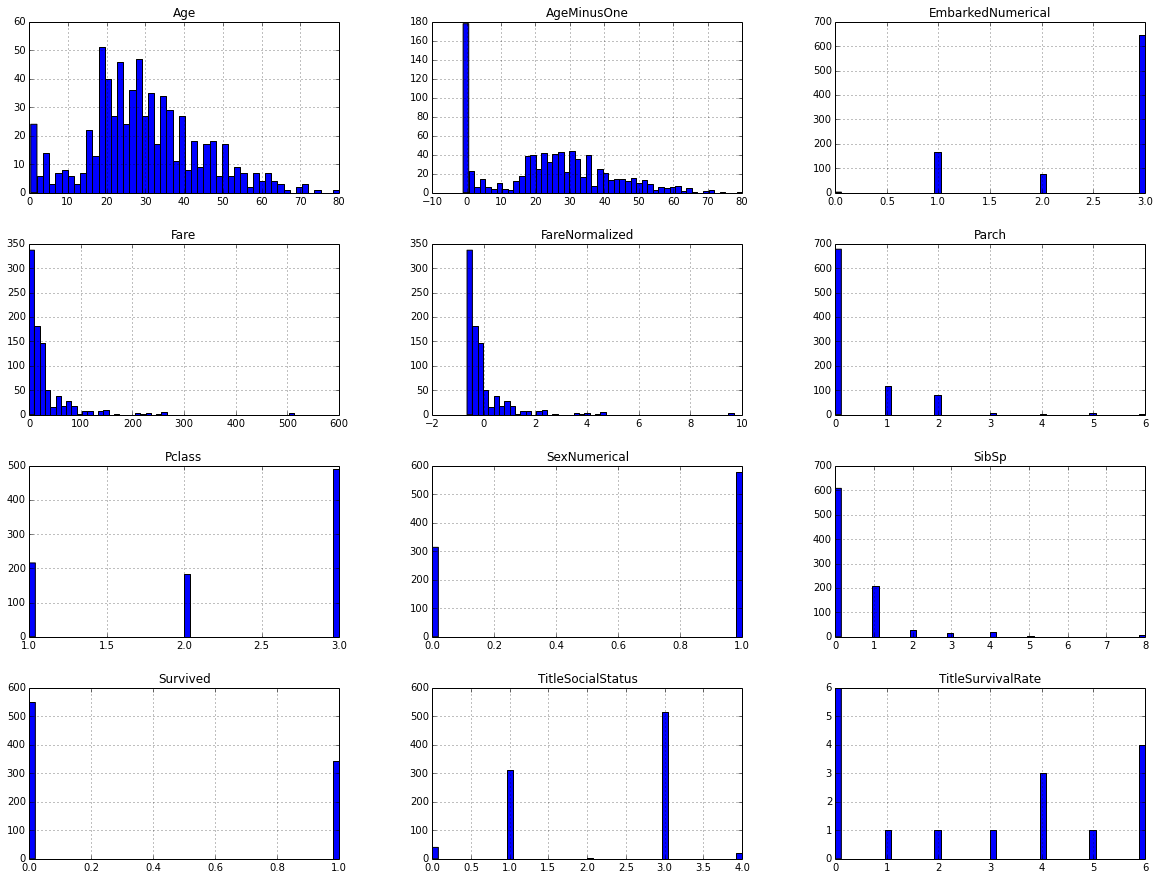

In [41]:
%matplotlib inline
train_df.hist(bins=50, figsize=(20, 15))